Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [1]:
import sklearn.datasets

In [231]:
X, y = sklearn.datasets.load_digits(return_X_y=True)

In [25]:
print X.shape, y.shape

(1797, 64) (1797,)


Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.



1.Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score

res = cross_val_score(dtc, X, y, cv=10)

res


array([ 0.79459459,  0.8579235 ,  0.83977901,  0.81666667,  0.77094972,
        0.87150838,  0.84357542,  0.80898876,  0.84180791,  0.8125    ])

In [30]:
print res.mean()

0.825829395726


2.Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.



In [32]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_estimators=100)

In [33]:
res2 = cross_val_score(bc, X, y, cv=10)

In [34]:
res2

array([ 0.88108108,  0.95081967,  0.90607735,  0.92777778,  0.92178771,
        0.98324022,  0.95530726,  0.93258427,  0.85875706,  0.92045455])

In [35]:
res2.mean()

0.92378869518513906

3.Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на √d‾‾ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [49]:
from math import sqrt
features = int(sqrt(X.shape[1]))
bc2 = BaggingClassifier(n_estimators=100, max_features=features)
features

8

In [50]:
res3 = cross_val_score(bc2, X, y, cv=10)

In [51]:
res3

array([ 0.90810811,  0.95081967,  0.92265193,  0.88888889,  0.94972067,
        0.95530726,  0.94413408,  0.98876404,  0.9039548 ,  0.90340909])

In [52]:
res3.mean()

0.93157585521157849

4.Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же √d‾‾ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.



In [54]:
rtc = DecisionTreeClassifier(splitter='random', max_features='sqrt')

In [55]:
brtc = BaggingClassifier(rtc, n_estimators=100)

In [56]:
res4 = cross_val_score(brtc, X, y, cv=10)

In [57]:
res4

array([ 0.9027027 ,  0.97814208,  0.95027624,  0.94444444,  0.96648045,
        0.97765363,  0.97206704,  0.97752809,  0.94915254,  0.94318182])

In [59]:
res4.mean()

0.95616290345045774

5.Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=1)

In [76]:
res51 = cross_val_score(rfc1, X, y, cv=10)

In [77]:
res51

array([ 0.91891892,  0.9726776 ,  0.9558011 ,  0.95      ,  0.95530726,
        0.97765363,  0.98324022,  0.98314607,  0.93220339,  0.94318182])

In [78]:
res51.mean()

0.95721300122662034

In [80]:
rfc52 = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=1)
res52 = cross_val_score(rfc52, X, y, cv=10)

In [81]:
res52.mean()

0.95721300122662034

In [82]:
rfc53 = RandomForestClassifier(n_estimators=1000, max_features='auto', random_state=1)
res53 = cross_val_score(rfc53, X, y, cv=10)
res53

array([ 0.91351351,  0.9726776 ,  0.93922652,  0.96111111,  0.94972067,
        0.97206704,  0.97765363,  0.96629213,  0.93785311,  0.94318182])

In [83]:
res53.mean()

0.95332971407300915

In [84]:
rfc53.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [117]:
parameters_grid = {
    'n_estimators' : range(100, 1000, 100),
    'max_features' : [2, 16, 32, 48, 63],
    'max_depth' : range(2, 11, 2)
}

In [118]:
print range(100, 1000, 200), range(0, 65, 16), range(2,11, 2)

[100, 300, 500, 700, 900] [0, 16, 32, 48, 64] [2, 4, 6, 8, 10]


In [119]:
from sklearn import grid_search


grid = grid_search.RandomizedSearchCV(RandomForestClassifier(), parameters_grid, scoring = 'accuracy', cv = 10, n_iter = 20, 
                                                   random_state = 0)

In [120]:
grid.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900], 'max_features': [2, 16, 32, 48, 63], 'max_depth': [2, 4, 6, 8, 10]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          scoring='accuracy', verbose=0)

In [121]:
print grid.best_score_

0.952698942682


In [122]:
print grid.best_params_

{'n_estimators': 400, 'max_features': 2, 'max_depth': 10}


In [128]:
print grid.grid_scores_

[mean: 0.91319, std: 0.03449, params: {'n_estimators': 400, 'max_features': 32, 'max_depth': 6}, mean: 0.92710, std: 0.03059, params: {'n_estimators': 300, 'max_features': 16, 'max_depth': 6}, mean: 0.94713, std: 0.02608, params: {'n_estimators': 900, 'max_features': 16, 'max_depth': 10}, mean: 0.95270, std: 0.02225, params: {'n_estimators': 400, 'max_features': 2, 'max_depth': 10}, mean: 0.81525, std: 0.04210, params: {'n_estimators': 400, 'max_features': 48, 'max_depth': 4}, mean: 0.85253, std: 0.03962, params: {'n_estimators': 200, 'max_features': 32, 'max_depth': 4}, mean: 0.93545, std: 0.03041, params: {'n_estimators': 200, 'max_features': 16, 'max_depth': 8}, mean: 0.94769, std: 0.02870, params: {'n_estimators': 300, 'max_features': 2, 'max_depth': 8}, mean: 0.93434, std: 0.03127, params: {'n_estimators': 100, 'max_features': 48, 'max_depth': 10}, mean: 0.92599, std: 0.03762, params: {'n_estimators': 700, 'max_features': 48, 'max_depth': 8}, mean: 0.94769, std: 0.02787, params: {

In [192]:
print grid.grid_scores_[0][1]

0.913188647746


In [183]:
print grid.grid_scores_[19]

mean: 0.94380, std: 0.02760, params: {'n_estimators': 500, 'max_features': 2, 'max_depth': 8}


In [154]:
l = grid.grid_scores_[:1]

In [161]:
l[0][0]['max_depth']

6

In [167]:
grid.grid_scores_[:][0][0]['max_depth']

6

In [196]:
for l in grid.grid_scores_:
    print l[0]['n_estimators'], l[0]['max_depth'], l[0]['max_features'],l[1]

400 6 32 0.913188647746
300 6 16 0.927100723428
900 10 16 0.94713411241
400 10 2 0.952698942682
400 4 48 0.815247634947
200 4 32 0.852531997774
200 8 16 0.935447968837
300 8 2 0.947690595437
100 10 48 0.934335002782
700 8 48 0.925987757373
900 8 2 0.947690595437
500 8 48 0.923205342237
900 6 16 0.928213689482
900 2 2 0.844184752365
100 6 63 0.874234835838
400 8 32 0.939343350028
100 6 32 0.913188647746
600 2 2 0.84529771842
900 2 63 0.589872008904
500 8 2 0.943795214246


In [197]:
parameters_grid_2 = {
    'n_estimators' : [400],
    'max_features' : [2],
    'max_depth' : range(2, 11, 2)
}

In [207]:
grid2 = grid_search.GridSearchCV(RandomForestClassifier(), parameters_grid_2, scoring = 'accuracy', cv = 10)

In [208]:
grid2.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [400], 'max_features': [2], 'max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [237]:
y2 = []
x2 = []
for l in grid2.grid_scores_:
    print l[0]['n_estimators'], l[0]['max_depth'], l[0]['max_features'],l[1]
    x2.append(l[0]['max_depth'])
    y2.append(l[1])

400 2 2 0.833611574847
400 4 2 0.891485809683
400 6 2 0.927100723428
400 8 2 0.942682248191
400 10 2 0.953811908737


In [229]:
parameters_grid_3 = {
    'n_estimators' : [400],
    'max_features' : [2, 16, 32, 48, 63],
    'max_depth' : [10]
}
grid3 = grid_search.GridSearchCV(RandomForestClassifier(), parameters_grid_3, scoring = 'accuracy', cv = 10)


In [232]:
grid3.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [400], 'max_features': [2, 16, 32, 48, 63], 'max_depth': [10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [236]:
x3 = []
y3 = []
for l in grid3.grid_scores_:
    print l[0]['n_estimators'], l[0]['max_depth'], l[0]['max_features'],l[1]
    x3.append(l[0]['max_features'])
    y3.append(l[1])

400 10 2 0.949916527546
400 10 16 0.946021146355
400 10 32 0.944351697273
400 10 48 0.937117417919
400 10 63 0.923205342237


In [214]:
parameters_grid_4 = {
    'n_estimators' : range(100, 1000, 200),
    'max_features' : [2],
    'max_depth' : [10]
}
grid4 = grid_search.GridSearchCV(RandomForestClassifier(), parameters_grid_4, scoring = 'accuracy', cv = 10)
grid4.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 300, 500, 700, 900], 'max_features': [2], 'max_depth': [10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [223]:
y4 = []
x4 = []
for l in grid4.grid_scores_:
    print l[0]['n_estimators'], l[0]['max_depth'], l[0]['max_features'],l[1]
    y4.append(l[1])
    x4.append(l[0]['n_estimators'])

100 10 2 0.948247078464
300 10 2 0.954924874791
500 10 2 0.956037840846
700 10 2 0.95325542571
900 10 2 0.951585976628


Populating the interactive namespace from numpy and matplotlib


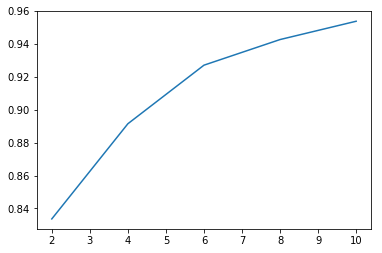

In [241]:
%pylab inline
pylab.plot(x2, y2)


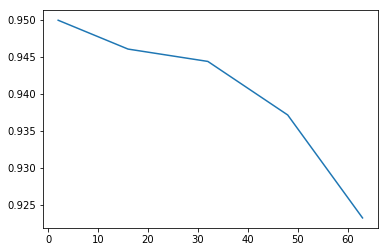

In [242]:
pylab.plot(x3, y3)


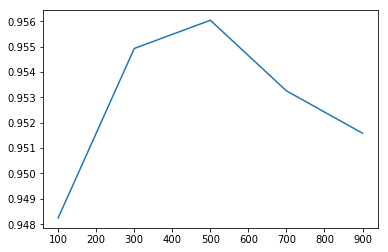

In [243]:
pylab.plot(x4, y4)

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

How to submit
When you're ready to submit, you can upload files for each part of the assignment on the "My submission" tab.

2 3 4 7

In [247]:
%%sh echo "2 3 4 7" > t5.txt

UsageError: %%sh is a cell magic, but the cell body is empty.
